# Intro
Neural Networks are one of the most popular and impactful branches of machine learning today. This is the very bleeding edge of data science, but it has historical roots. In this module we'll explore:

+ The perceptron model
+ Multi-level perceptrons and neural network structure
+ How to use Neural Networks for supervised and unsupervised learning

This will be just the beginning of neural networks, and we'll add resources to go deeper along the way.

# Perceptron models

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Perceptron

Before we get into neural networks, we need to talk about perceptron models. Perceptron models will form the basis of Neural Networks. The models themselves are heavily indebted to linear regression which was one of the first models we covered.

### Conceptual Basis

Remember the initial specification for a linear regression?

$$ y = \alpha + \beta X $$

The other key aspect of linear regression is our cost function. In the linear regression context, we are trying to minimize the squared error terms. 

Perceptrons rely on that same linear specification but use it for a different purpose. Firstly, perceptrons are classifiers, at their core binary classifiers (though much like other methods there are ways to expand them to work with multiple classes). This takes our functional form and turns it into a rule to classify into groups A and B.

$$ \alpha + \beta X \geq 0 : A $$
$$ \alpha + \beta X < 0 : B $$

Here the $\alpha$ is the _shift_ , a way of regularizing the boundary to zero. Then $\beta$ is the _weight_ , which controls the influence of each variable in a linear fashion much like OLS.

Recall in linear regression we minimize the error. In SVM the goal was to create the largest margin between our boundary and the nearest data points of each class. For Perceptron models, the cost we are trying to minimize is the sum of the output of our functional form from all misclasified examples. This can be thought of as minimizing the error for the classifier.  So if we create a boundary with errors, we take the absolute value of the misclasified observations and sum them together for our cost. Based on this cost function all boundries that correctly divide all data points into classes with no errors will have the same cost: zero.

It's important to note that in this kind of simple perceptron the outcome is binary. A result is either in class A or class B with no probability given or gradient permitted. When working with perceptrons, it is common practice to invoke a curve with a gradient to it, meaning the prediction takes non-binary values between zero and one.

The most common curve to use is called the _logistic function_ or _sigmoid curve_ because it gives a nice "S" or sigmoid shaped curve. The formula for that function is:

$$ \frac{1}{1+e^{-x}} $$

![image.png](attachment:image.png 'sigmoid curve')

Using this for perceptrons means outputting the value from our linear model into this function rather than simply using binary values for 0 if less than 0 and 1 if greater than 0. Allowing for continuous outputs from a perceptron will be valuable in allowing for more subtlety in our perceptron and thus in our neural networks.
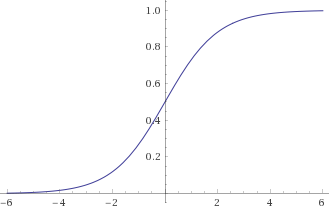

### Perceptrons in Practice

Now let's go through a perceptron in practice. To do so let's bring back the example from SVM: student test data.

In [19]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [20]:
# Import Perceptron.
from sklearn.linear_model import Perceptron

# Establish X and Y.
X = test_data[['test', 'project']]
Y = test_data['pass']

# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
# perceptron = Perceptron(n_iter=10000)
### If running in your own environment on scikit-learn 0.21, run the line of code below instead:
perceptron = Perceptron(max_iter=10000, tol=0, n_iter_no_change=10000)


# Fit Perceptron.
perceptron.fit(X, Y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, Y)))

Score: 1.0


/home/uzi/.venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Let's use the same mesh we've used previously to create and show our perceptron border.

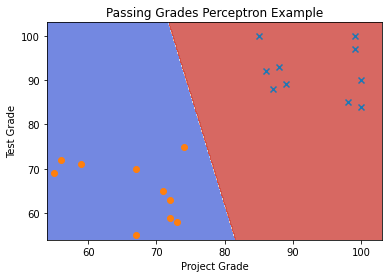

In [21]:
# Establish a mesh for our plot.
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

# Predict over that mesh.
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')


# Reshape the prediction to be plottable.
Z = Z.reshape(xx.shape)

# Plot the mesh.
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot our two scatters.
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

# Aesthetics.
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades Perceptron Example')
plt.show()

Now, this is clearly different from the optimal SVM model. The simplicity of the perceptron cost function means that this is totally satisfactory to the model: every point is correctly classified so the cost is zero, and the perceptron algorithm stops as soon as that condition is met. Until it meets that condition, however, it keeps trying new things to see if it can get a successful classifier.

If all of this seems rather inefficient that's because it often is. That decision boundary looks inefficient to the human eye. It took a lot of iterations to get there. There are many techniques that are more useful on their own.

However, here you should think of the decision tree. Decision trees are not always a great model on their own, but through boosting or random forest we were able to craft some of the most powerful models in machine learning. The same is true with the perceptron.

That's because a neural network, when you get down to it, is just an ensemble of perceptrons.

# What is a neural network?
Before we do anything more we need to talk. How's it going? You all right? Hopefully things are hard but not, you know, too hard. The sweet spot. Going on a tough hike but not climbing Everest. Maybe you've even seen a few of the signposts that say "Everest, this way" and wandered down those paths for a bit to see what was there. It's fun to live on the edge every now and again. But we haven't strayed far down any of those paths or pushed to too great a height too quickly.

The point is, you shouldn't need oxygen.

But now we're on to neural networks and, well, the air here can get a little thin.

So first a few disclaimers.

# Disclaimers
+ We are going to stick to classical neural networks, occasionally giving hints towards more current, but less used, techniques.
+ The math here is going to be very hand wavy. For most of you it's better that way. If you want the background math we will link to it when we can.
+ Neural networks is an evolving field. If you really love this you should consider getting a PhD in it or at least + keeping up with the latest papers from the field and industry.
+ Most data science jobs come nowhere near pushing the bounds of neural networks. If you want to do that, there is a smaller list of places you'll want to apply, and again, a PhD might be necessary for accessing those teams.
+ Some of the new new here is still controversial. Particularly some of the people who are more classical statisticians have issues with neural networks and deep learning, which are a black box and initially it wasn't even really understood why they worked so well in some circumstances. The tide seems to be moving against this perspective, but it is definitely out there.
+ If you want more [this book](http://www.deeplearningbook.org/) is fantastic.

Ok, now we can actually talk about what a neural network is. To do that, we have to talk about the brain.

# Your brain, neural networks, and you
As a human being, you have a brain. And quite a nice one by the looks of it. Well done for making it this far in the course.

Your brain, and your whole nervous system, is made up of neurons and axons. Bear with us on this as some of the biology here will be oversimplified, but these simplifications are perpetuated in the machine learning algorithms we're actually talking about, so they are good to know.

Neurons can be thought of as the information processors of the brain. They react to signals and create responses. Axons connect neurons to each other. A human brain is made up of billions of neurons linked to each other through a complex web of axons. Information passes through several neurons in response to input or stimulus.

This is the basis of neural networks, the machine learning algorithm. Sometimes these are referred to as "artificial neural networks" so as to differentiate them from the biological variety. Sometimes that differentiation is noted because one is a computer program and the other is a vital organ.

# Artificial neural networks
To explain what an artificial neural network is, let's return to the perceptron.

![](https://curricula.thinkful.com/curricula/8bc40dfb-3bb7-4aa5-87d5-de71ef153263/dsbc-neural-networks-v1/assets2/what_is_a_neural_network/perceptron_single.jpeg 'single preceptron diagram')

The perceptron model takes in some data and generates a response. Now, previously we mentioned that this is usually a poorly performing model. We've dealt with this problem in the past using ensemble techniques like bagging which gave us random forests. Let's keep that concept of ensemble modeling and have many perceptrons in our model.

![](https://curricula.thinkful.com/curricula/8bc40dfb-3bb7-4aa5-87d5-de71ef153263/dsbc-neural-networks-v1/assets2/what_is_a_neural_network/single_layer.jpeg 'single-layered model')

Now we're getting closer to a neural network. But let's also recall another ensemble concept: boosting. That's when we take the output from one model and use it as the input for another. Let's use boosting to feed the results from one part of our model into the next part.

![](https://curricula.thinkful.com/curricula/8bc40dfb-3bb7-4aa5-87d5-de71ef153263/dsbc-neural-networks-v1/assets2/what_is_a_neural_network/two_layer.jpeg 'two-layerd model')

Now that is a serious neural network. A few things to note before we move on and start seeing how to actually implement these models.

Firstly, the columns of perceptrons are called layers. Neural networks have layers much like certain pastries, aromatic bulbs, or [green monsters](https://www.youtube.com/watch?v=_bMcXVe8zIs). They can be single layer or multi layered. The first layer is called the visible layer.

Any layers after that first layer are called hidden layers. These are features built on features. They are called hidden because you're not directly observing their inputs or outputs. They serve as one way of getting around linearity of the initial perceptron boundary. We now have a function of a function, giving greater detail and subtlety to our model.

Now, this model has many many perceptrons, so how are the perceptrons different from one another? Surely we're not just doing the same thing again and again and again, right? To answer that, recall the initial perceptron. Each variable input into the model was given a weight. Here our different perceptrons give different variables different sets of weights. When done at a mass scale (it's not uncommon for a layer to be hundreds or thousands of perceptrons wide) they combine to overcome the initial assumption of linearity, allowing for a model where different combinations of variables have hugely different effects. This ultimately generates a very powerful model.

All of the networks we've shown here are what are called "fully connected". Every perceptron in one layer links to every perceptron in the following layer. You can weight your perceptrons so that they are not fully connected or evenly balanced in their connections.

That second image, the one with a single layer of perceptrons, is actually a simple, single layer neural network. Many-layered networks begin to enter into the realm of deep learning. Also of note is that direction was removed from our final image. The way the layers feed back into each other ends up being a key differentiator in different styles of neural network, so data does not always flow in one direction.

We'll cover all of this in more detail as we get into implementations, but you should now have a conceptual understanding of what a neural network is going to look like. Let's build one!

# Supervised neural networks

We're ready to build our first neural network. We will have multiple features we feed into our model, each of which will go through a set of perceptron models to arrive at a response which will be trained to our output.

Like many models we've covered, this can be used as both a regression or classification model.

First, we need to load our dataset. For this example we'll use The Museum of Modern Art in New York's public dataset on their collection.

In [25]:
artworks = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Artworks.csv')

In [26]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

We'll also do a bit of data processing and cleaning, selecting columns of interest and converting URL's to booleans indicating whether they are present.

In [27]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()

In [28]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000


## Building a Model

Now, let's see if we can use multi-layer perceptron modeling (or "MLP") to see if we can classify the department a piece should go into using everything but the department name.

Before we import MLP from SKLearn and establish the model we first have to ensure correct typing for our data and do some other cleaning.

In [29]:
# Get data types.
artworks.dtypes

Artist           object
Nationality      object
Gender           object
Date             object
Department       object
DateAcquired     object
URL                bool
ThumbnailURL       bool
Height (cm)     float64
Width (cm)      float64
dtype: object

The `DateAcquired` column is an object. Let's transform that to a datetime object and add a feature for just the year the artwork was acquired.

In [30]:
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

Great. Let's do some more miscellaneous cleaning.

In [40]:
# Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

In [42]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

/home/uzi/.venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
mlp.score(X, Y)

0.7970696105376364

In [49]:
Y.value_counts()/len(Y)

Drawings & Prints        0.622800
Photography              0.225837
Architecture & Design    0.113383
Painting & Sculpture     0.033578
Media and Performance    0.004403
Name: Department, dtype: float64

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

/home/uzi/.venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/uzi/.venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/uzi/.venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/uzi/.venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([0.64897284, 0.73077807, 0.65241969, 0.65502344, 0.62286266])

Now we got a lot of information from all of this. Firstly we can see that the model seems to overfit, though there is still so remaining performance when validated with cross validation. This is a feature of neural networks that aren't given enough data for the number of features present. **Neural networks, in general, like _a lot_ of data**. You may also have noticed something about neural networks: **they can take a long time to run**. Try increasing the layer size by adding a zero. Feel free to interrupt the kernel if you don't have time...

Also note that we created bools for artist's name but left them out. Both of the above points are the reason for that. It would take much longer to run and it would be much more prone to overfitting.

## Model parameters

Now, before we move on and let you loose with some tasks to work on the model, let's go over the parameters.

We included one parameter: `hidden_layer_sizes`. Remember in the previous lesson, when we talked about layers in a neural network. This tells us how many and how big to make our layers. Pass in a tuple that specifies each layer's size. Our network is 1000 neurons wide and one layer. (100, 4, ) would create a network with two layers, one 100 wide and the other 4.

How many layers to include is determined by two things: computational resources and cross validation searching for convergence. It's generally less than the number of input variables you have.

You can also set an `alpha`. Neural networks like this use a regularization parameter that penalizes large coefficients just like we discussed in the advanced regression section. Alpha scales that penalty.

Lastly, we'll discuss the activation function. The activation function determines whether the output from an individual perceptron is binary or continuous. By default this is a 'relu', or 'rectified linear unit function' function. In the exercise we went through earlier we used this binary function, but we discussed the _sigmoid_ as a reasonable alternative. The _sigmoid_ (called 'logistic' by SKLearn because it's a 'logistic sigmoid function') allows for continuous variables between 0 and 1, which allows for a more nuanced model. It does come at the cost of increased computational complexity.

If you want to learn more about these, study [activation functions](https://en.wikipedia.org/wiki/Activation_function) and [multilayer perceptrons](https://en.wikipedia.org/wiki/Multilayer_perceptron). The [Deep Learning](http://www.deeplearningbook.org/) book referenced earlier goes into great detail on the linear algebra involved.

You could also just test the models with cross validation. Unless neural networks are your specialty cross validation should be sufficient.

For the other parameters and their defaults, check out the [MLPClassifier documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

## Drill: Playing with layers

Now it's your turn. Using the space below, experiment with different hidden layer structures. You can try this on a subset of the data to improve runtime. See how things vary. See what seems to matter the most. Feel free to manipulate other parameters as well. It may also be beneficial to do some real feature selection work...

In [62]:
# Your code here. Experiment with hidden layers to build your own model.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)
X = pd.get_dummies(X, sparse=True)

mlp = MLPClassifier(hidden_layer_sizes=(100,5))
mlp.fit(X, Y)
mlp.score(X, Y)

0.6227996801205982

In [63]:
cross_val_score(mlp, X, Y, cv=5)

array([0.62277678, 0.62277678, 0.62277678, 0.6228054 , 0.62286266])